In [1]:
import numpy as np
import time

import PIL.Image as Image
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub



classifier_model ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE+(3,))
])


16384/10484 [==============================================] - 0s 0us/step


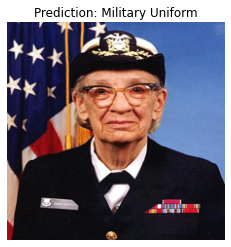

In [3]:
Imagen = '/content/drive/MyDrive/Colab Notebooks/Image.jpg'
Imagen2 = '/content/drive/MyDrive/Colab Notebooks/Flor1.jpg'
Imagen3 = '/content/drive/MyDrive/Colab Notebooks/Gato.jpg'
#https://www.kaggle.com/crawford/cat-dataset
grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SHAPE)
grace_hopper
#Tamaño
grace_hopper = np.array(grace_hopper)/255.0
grace_hopper.shape

result = classifier.predict(grace_hopper[np.newaxis, ...])
result.shape
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

#Etiquetas 
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

plt.imshow(grace_hopper)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

In [6]:
predicted_class


653

In [ ]:

data_root1 = '/content/drive/MyDrive/Colab Notebooks/flower_photos'



train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  str(data_root1),
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1206 files belonging to 5 classes.
Using 965 files for training.


In [ ]:
class_names = np.array(train_ds.class_names)
print(class_names)
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))


AttributeError: ignored

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
result_batch = classifier.predict(train_ds)
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

(32, 224, 224, 3)
(32,)


array(['bee', 'sea anemone', 'daisy', 'daisy', 'daisy', 'daisy',
       'volcano', 'bee', 'daisy', 'quill', 'bubble', 'cardoon',
       'sea urchin', 'plow', 'daisy', 'daisy', 'daisy', 'lakeside',
       'daisy', 'daisy', 'bee', 'daisy', 'sea urchin', 'daisy', 'daisy',
       'daisy', 'barn spider', 'daisy', 'pot', 'daisy', 'lacewing',
       'daisy', 'bee', 'sea urchin', 'daisy', 'daisy', 'daisy', 'daisy',
       'cardoon', 'daisy', 'mushroom', 'sulphur-crested cockatoo',
       'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'barn spider', 'daisy', 'cardoon', 'daisy', 'cardoon', 'bee',
       'sea urchin', 'daisy', 'daisy', 'daisy', 'daisy', 'bee', 'bee',
       'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'puffer', 'sea urchin', 'daisy', 'ant', 'daisy', 'barn spider',
       'daisy', 'daisy', 'sea urchin', 'cardoon', 'daisy', 'daisy',
       'daisy', 'daisy', 'daisy', 'bee', 'rapeseed', 'hay',
       'tiger beetle', 'bee', 'daisy', 'daisy', 'dai

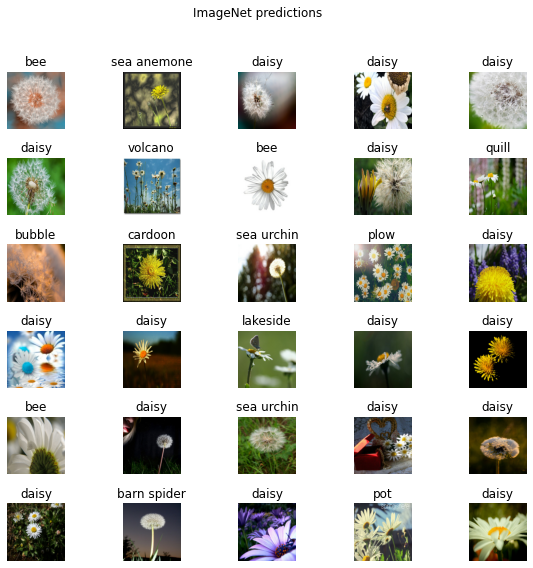

In [ ]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')


_ = plt.suptitle("ImageNet predictions")